## 💡 Sobre o Desafío 💡

In [4]:
# Telecom X – Parte 2: Prevendo Churn

# 📣 História do Desafio

# Parabéns! 🎉 Você foi promovido após seu excelente desempenho na análise exploratória da evasão de clientes na Telecom X.
# Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

# Agora, você foi convidado a integrar oficialmente a equipe de Machine Learning da empresa!

# 🎯 Missão

# Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

# A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

# 🧠 Objetivos do Desafio

# Preparar os dados para a modelagem (tratamento, encoding, normalização).

# Realizar análise de correlação e seleção de variáveis.

# Treinar dois ou mais modelos de classificação.

# Avaliar o desempenho dos modelos com métricas.

# Interpretar os resultados, incluindo a importância das variáveis.

# Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

# 🧰 O que você vai praticar

# ✅ Pré-processamento de dados para Machine Learning
# ✅ Construção e avaliação de modelos preditivos
# ✅ Interpretação dos resultados e entrega de insights
# ✅ Comunicação técnica com foco estratégico

# 🚀 Você agora é: Analista de Machine Learning Júnior

# A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma solução de inteligência preditiva eficaz. Boa sorte!

## 🛠️ Preparação dos Dados

In [5]:
# Carregue o arquivo CSV que contém os dados tratados anteriormente.
# 📂 Atenção: Utilize o mesmo arquivo que você limpou e organizou na parte 1 do desafio Telecom X.
# Ele deve conter somente as colunas relevantes, já com os dados corrigidos e padronizados.

import pandas as pd

# Carregar o arquivo dados_tratados.csv
df = pd.read_csv('/content/dados_tratados.csv')

# Visualizar as primeiras linhas
df.head()

,customerID,cancelou,genero,idoso,tem_parceiro,tem_dependentes,tempo_cliente_meses,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,mensalidade,faturamento_total,valor_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7267 non-null   object 
 1   cancelou              7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   tem_parceiro          7267 non-null   object 
 5   tem_dependentes       7267 non-null   object 
 6   tempo_cliente_meses   7267 non-null   int64  
 7   telefone_ativo        7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   tipo_internet         7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_tv          7267 non-null   object 
 15  streaming_filmes     

In [7]:
# Pré-processamento para Modelagem Preditiva
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Carregar o arquivo
df = pd.read_csv('dados_tratados.csv')

# Preencher valores ausentes na coluna 'faturamento_total' com a mediana
# df['faturamento_total'].fillna(df['faturamento_total'].median(), inplace=True)
df['faturamento_total'] = df['faturamento_total'].fillna(df['faturamento_total'].median())

# Codificar variáveis categóricas (exceto customerID)
label_cols = df.select_dtypes(include='object').columns.drop('customerID')
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Normalizar variáveis numéricas
num_cols = ['tempo_cliente_meses', 'mensalidade', 'faturamento_total', 'valor_diario']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Visualizar os dados processados
df.head()

,customerID,cancelou,genero,idoso,tem_parceiro,tem_dependentes,tempo_cliente_meses,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,mensalidade,faturamento_total,valor_diario
0,0002-ORFBO,0,0,0,1,1,0.125000,1,0,0,...,0,1,1,0,1,1,3,0.471144,0.066294,0.471144
1,0003-MKNFE,0,1,0,0,0,0.125000,1,1,0,...,0,0,0,1,0,0,3,0.414428,0.060420,0.414428
2,0004-TLHLJ,2,1,0,0,0,0.055556,1,0,1,...,1,0,0,0,0,1,2,0.553731,0.030239,0.553731
3,0011-IGKFF,2,1,1,1,0,0.180556,1,0,1,...,1,0,1,1,0,1,2,0.793532,0.140670,0.793532
4,0013-EXCHZ,2,0,1,1,0,0.041667,1,0,1,...,0,1,1,0,0,1,3,0.653234,0.028687,0.653234


In [8]:
# Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente).
# Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

# Remover coluna irrelevante

# Remover a coluna de identificador único
df.drop(columns=['customerID'], inplace=True)

# Visualizar as primeiras linhas após a remoção
df.head()

,cancelou,genero,idoso,tem_parceiro,tem_dependentes,tempo_cliente_meses,telefone_ativo,multiplas_linhas,tipo_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,mensalidade,faturamento_total,valor_diario
0,0,0,0,1,1,0.125000,1,0,0,0,...,0,1,1,0,1,1,3,0.471144,0.066294,0.471144
1,0,1,0,0,0,0.125000,1,1,0,0,...,0,0,0,1,0,0,3,0.414428,0.060420,0.414428
2,2,1,0,0,0,0.055556,1,0,1,0,...,1,0,0,0,0,1,2,0.553731,0.030239,0.553731
3,2,1,1,1,0,0.180556,1,0,1,0,...,1,0,1,1,0,1,2,0.793532,0.140670,0.793532
4,2,0,1,1,0,0.041667,1,0,1,0,...,0,1,1,0,0,1,3,0.653234,0.028687,0.653234


## 🎯 Correlação e Seleção de Variáveis

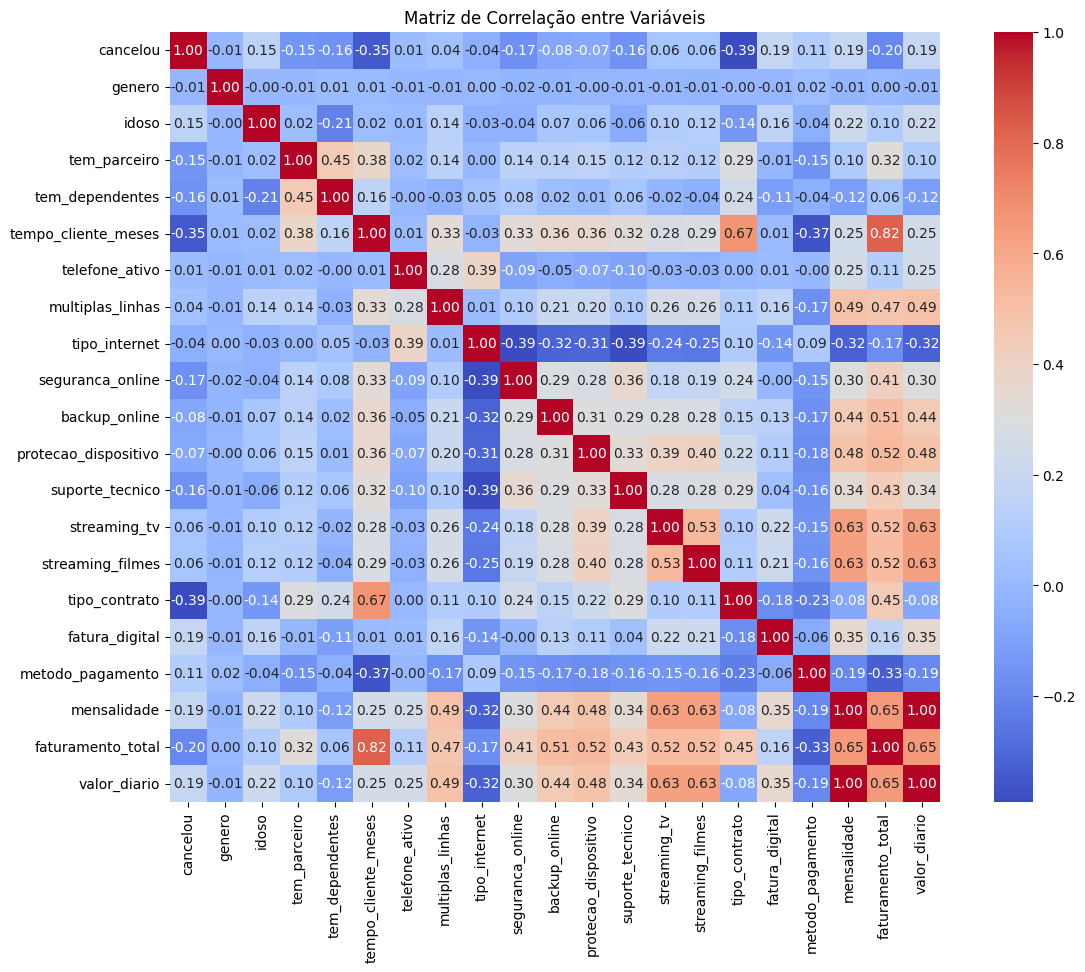

🔍 Colunas com baixa correlação com a variável alvo 'cancelou':
['genero', 'telefone_ativo', 'multiplas_linhas', 'tipo_internet']


In [9]:
# Identificar colunas com baixa correlação com a variável alvo cancelou, o que pode indicar que são irrelevantes para os modelos preditivos:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Codificar variáveis categóricas (exceto customerID, que já foi removido)
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

# Identificar colunas com baixa correlação com a variável alvo 'cancelou'
target_corr = correlation_matrix['cancelou'].abs().sort_values()
low_corr_features = target_corr[target_corr < 0.05].index.tolist()

print("🔍 Colunas com baixa correlação com a variável alvo 'cancelou':")
print(low_corr_features)

In [10]:
# Com base na análise de correlação, as seguintes colunas apresentaram baixa correlação com a variável alvo cancelou:

# genero
# telefone_ativo
# multiplas_linhas
# tipo_internet

# Essas colunas podem ser consideradas irrelevantes para os modelos preditivos, especialmente se:

# Não forem importantes em modelos baseados em árvore (como Random Forest).
# Não contribuírem significativamente para a performance em testes de validação.

# Recomendações
# Você pode seguir com a remoção dessas colunas para simplificar o modelo e evitar ruído:

# Remover colunas com baixa correlação
df.drop(columns=['genero', 'telefone_ativo', 'multiplas_linhas', 'tipo_internet'], inplace=True)

# Visualizar o resultado
df.head()

,cancelou,idoso,tem_parceiro,tem_dependentes,tempo_cliente_meses,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,mensalidade,faturamento_total,valor_diario
0,0,0,1,1,0.125000,0,1,0,1,1,0,1,1,3,0.471144,0.066294,0.471144
1,0,0,0,0,0.125000,0,0,0,0,0,1,0,0,3,0.414428,0.060420,0.414428
2,2,0,0,0,0.055556,0,0,1,0,0,0,0,1,2,0.553731,0.030239,0.553731
3,2,1,1,0,0.180556,0,1,1,0,1,1,0,1,2,0.793532,0.140670,0.793532
4,2,1,1,0,0.041667,0,0,0,1,1,0,0,1,3,0.653234,0.028687,0.653234


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cancelou              7267 non-null   int64  
 1   idoso                 7267 non-null   int64  
 2   tem_parceiro          7267 non-null   int64  
 3   tem_dependentes       7267 non-null   int64  
 4   tempo_cliente_meses   7267 non-null   float64
 5   seguranca_online      7267 non-null   int64  
 6   backup_online         7267 non-null   int64  
 7   protecao_dispositivo  7267 non-null   int64  
 8   suporte_tecnico       7267 non-null   int64  
 9   streaming_tv          7267 non-null   int64  
 10  streaming_filmes      7267 non-null   int64  
 11  tipo_contrato         7267 non-null   int64  
 12  fatura_digital        7267 non-null   int64  
 13  metodo_pagamento      7267 non-null   int64  
 14  mensalidade           7267 non-null   float64
 15  faturamento_total    

In [13]:
# Código para treinar e avaliar os modelos Random Forest e Regressão Logística com os dados já tratados:

# Esse código vai te mostrar:

# A acurácia de cada modelo.
# A matriz de confusão.
# O relatório de classificação com precisão, recall e F1-score.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar variáveis independentes (X) e alvo (y)
X = df.drop(columns=['cancelou'])
y = df['cancelou']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Treinar Regressão Logística
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Avaliar Random Forest
print("🔍 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

# Avaliar Regressão Logística
print("\n🔍 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

🔍 Random Forest Results:
Accuracy: 0.7519486474094452
Confusion Matrix:
 [[1376   35  171]
 [  49    0   18]
 [ 255   13  264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1582
           1       0.00      0.00      0.00        67
           2       0.58      0.50      0.54       532

    accuracy                           0.75      2181
   macro avg       0.47      0.46      0.46      2181
weighted avg       0.74      0.75      0.74      2181


🔍 Logistic Regression Results:
Accuracy: 0.7776249426868409
Confusion Matrix:
 [[1416    0  166]
 [  53    0   14]
 [ 252    0  280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1582
           1       0.00      0.00      0.00        67
           2       0.61      0.53      0.56       532

    accuracy                           0.78      2181
   macro avg       0.48      0.47   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Código completo para aplicar o One-Hot Encoding nas variáveis categóricas:

# Identificar colunas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Visualizar o resultado
df_encoded.head()

# Esse processo transforma cada categoria em uma coluna binária (0 ou 1), tornando os dados compatíveis com algoritmos de Machine Learning.

,cancelou,idoso,tem_parceiro,tem_dependentes,tempo_cliente_meses,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,mensalidade,faturamento_total,valor_diario
0,0,0,1,1,0.125000,0,1,0,1,1,0,1,1,3,0.471144,0.066294,0.471144
1,0,0,0,0,0.125000,0,0,0,0,0,1,0,0,3,0.414428,0.060420,0.414428
2,2,0,0,0,0.055556,0,0,1,0,0,0,0,1,2,0.553731,0.030239,0.553731
3,2,1,1,0,0.180556,0,1,1,0,1,1,0,1,2,0.793532,0.140670,0.793532
4,2,1,1,0,0.041667,0,0,0,1,1,0,0,1,3,0.653234,0.028687,0.653234


In [15]:
# Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos.
# Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

# Contagem de clientes por classe da variável 'cancelou'
class_counts = df['cancelou'].value_counts()
class_proportions = df['cancelou'].value_counts(normalize=True)

# Exibir contagem e proporção
print("📊 Contagem de clientes por classe:")
print(class_counts)

print("\n📊 Proporção de clientes por classe:")
print(class_proportions)

# Calcular a razão entre a classe mais frequente e a menos frequente
imbalance_ratio = round(class_proportions.max() / class_proportions.min(), 2)
print(f"\n⚖️ Razão entre a classe mais frequente e a menos frequente: {imbalance_ratio}")

📊 Contagem de clientes por classe:
cancelou
0    5174
2    1869
1     224
Name: count, dtype: int64

📊 Proporção de clientes por classe:
cancelou
0    0.711986
2    0.257190
1    0.030824
Name: proportion, dtype: float64

⚖️ Razão entre a classe mais frequente e a menos frequente: 23.1


In [16]:
# Balanceamento de Classes (opcional)
# Aplique técnicas de balanceamento como undersampling ou oversampling.
# Em situações de forte desbalanceamento, ferramentas como o SMOTE podem ser úteis para gerar exemplos sintéticos da classe minoritária.

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Separar variáveis independentes (X) e alvo (y)
X = df.drop(columns=['cancelou'])
y = df['cancelou']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar a nova distribuição das classes
print("📊 Distribuição das classes antes do SMOTE:")
print(Counter(y_train))

print("\n📊 Distribuição das classes após o SMOTE:")
print(Counter(y_train_bal))

📊 Distribuição das classes antes do SMOTE:
Counter({0: 3592, 2: 1337, 1: 157})

📊 Distribuição das classes após o SMOTE:
Counter({0: 3592, 2: 3592, 1: 3592})


In [17]:
# Normalização ou Padronização (se necessário)
# Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
# Modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento.
# Já modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

# Modelos que requerem normalização/padronização - Recomendado: aplicar normalização (ex: MinMaxScaler) ou padronização (ex: StandardScaler).

# Modelos que não requerem normalização: Não necessário: esses modelos funcionam bem com dados em diferentes escalas.

# Treinamento com MinMaxScaler e StandardScaler
# Esse código vai te permitir comparar o desempenho dos modelos com diferentes tipos de escalonamento.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Separar variáveis independentes e alvo
X = df.drop(columns=['cancelou'])
y = df['cancelou']

# Aplicar MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)

# Aplicar StandardScaler
standard_scaler = StandardScaler()
X_standard = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

# Dividir em treino e teste
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, test_size=0.3, random_state=42)
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_minmax_bal, y_train_minmax_bal = smote.fit_resample(X_train_minmax, y_train_minmax)
X_train_standard_bal, y_train_standard_bal = smote.fit_resample(X_train_standard, y_train_standard)

# Treinar e avaliar Random Forest com MinMaxScaler
rf_minmax = RandomForestClassifier(random_state=42)
rf_minmax.fit(X_train_minmax_bal, y_train_minmax_bal)
rf_minmax_preds = rf_minmax.predict(X_test_minmax)
print("🔍 Random Forest (MinMaxScaler):")
print("Accuracy:", accuracy_score(y_test_minmax, rf_minmax_preds))
print(classification_report(y_test_minmax, rf_minmax_preds))

# Treinar e avaliar Logistic Regression com MinMaxScaler
lr_minmax = LogisticRegression(max_iter=1000)
lr_minmax.fit(X_train_minmax_bal, y_train_minmax_bal)
lr_minmax_preds = lr_minmax.predict(X_test_minmax)
print("\n🔍 Logistic Regression (MinMaxScaler):")
print("Accuracy:", accuracy_score(y_test_minmax, lr_minmax_preds))
print(classification_report(y_test_minmax, lr_minmax_preds))

# Treinar e avaliar Random Forest com StandardScaler
rf_standard = RandomForestClassifier(random_state=42)
rf_standard.fit(X_train_standard_bal, y_train_standard_bal)
rf_standard_preds = rf_standard.predict(X_test_standard)
print("\n🔍 Random Forest (StandardScaler):")
print("Accuracy:", accuracy_score(y_test_standard, rf_standard_preds))
print(classification_report(y_test_standard, rf_standard_preds))

# Treinar e avaliar Logistic Regression com StandardScaler
lr_standard = LogisticRegression(max_iter=1000)
lr_standard.fit(X_train_standard_bal, y_train_standard_bal)
lr_standard_preds = lr_standard.predict(X_test_standard)
print("\n🔍 Logistic Regression (StandardScaler):")
print("Accuracy:", accuracy_score(y_test_standard, lr_standard_preds))
print(classification_report(y_test_standard, lr_standard_preds))

🔍 Random Forest (MinMaxScaler):
Accuracy: 0.7267308574048602
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1582
           1       0.00      0.00      0.00        67
           2       0.54      0.62      0.57       532

    accuracy                           0.73      2181
   macro avg       0.46      0.47      0.46      2181
weighted avg       0.74      0.73      0.73      2181


🔍 Logistic Regression (MinMaxScaler):
Accuracy: 0.6020174232003668
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1582
           1       0.03      0.19      0.05        67
           2       0.51      0.70      0.59       532

    accuracy                           0.60      2181
   macro avg       0.48      0.49      0.45      2181
weighted avg       0.77      0.60      0.66      2181


🔍 Random Forest (StandardScaler):
Accuracy: 0.7235213204951857
              precision    recall  f1-score  

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


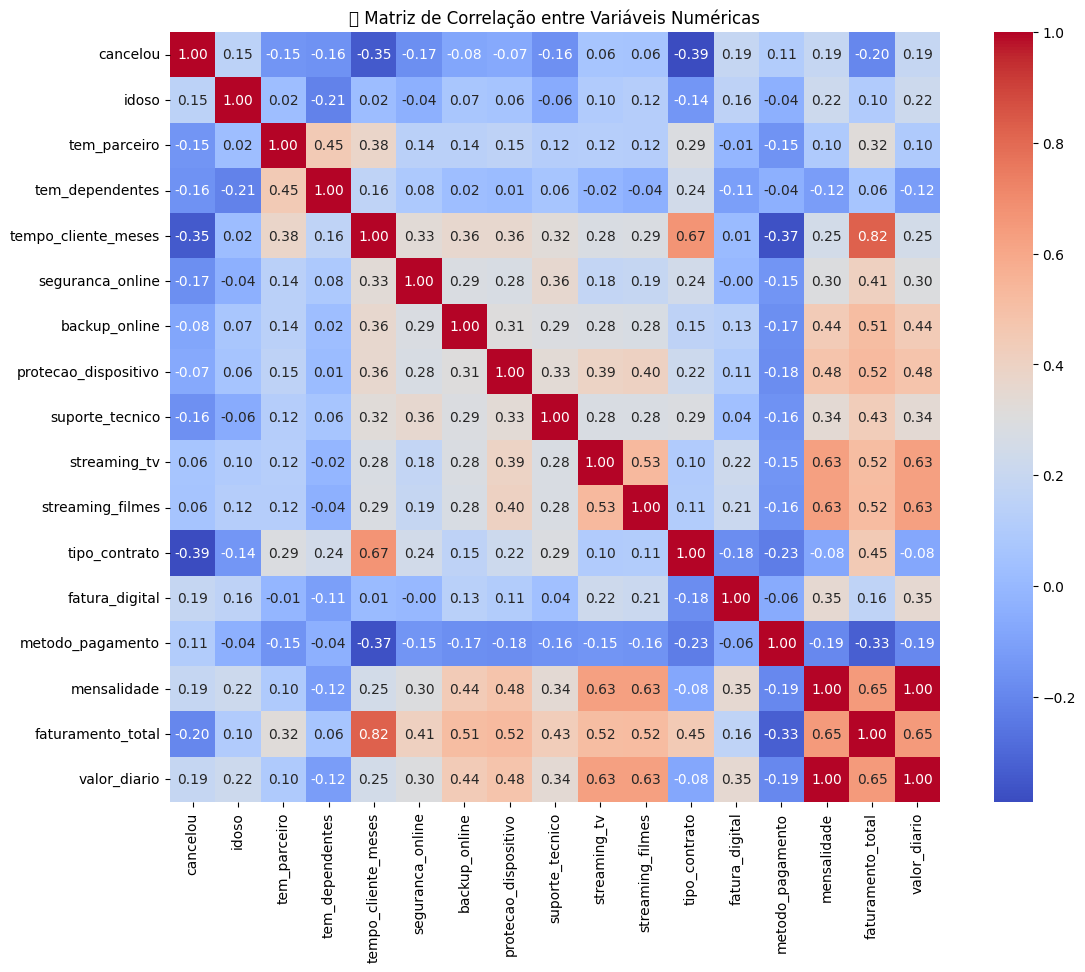

📌 Correlação com a variável alvo 'cancelou':
cancelou                1.000000
fatura_digital          0.189174
valor_diario            0.188562
mensalidade             0.188562
idoso                   0.148432
metodo_pagamento        0.105814
streaming_tv            0.061533
streaming_filmes        0.059753
protecao_dispositivo   -0.066113
backup_online          -0.080984
tem_parceiro           -0.146341
tem_dependentes        -0.160281
suporte_tecnico        -0.162320
seguranca_online       -0.168791
faturamento_total      -0.195532
tempo_cliente_meses    -0.345607
tipo_contrato          -0.390222
Name: cancelou, dtype: float64


In [18]:
# Análise de Correlação
# Visualize a matriz de correlação para identificar relações entre variáveis numéricas.
# Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o DataFrame já esteja carregado como 'df'
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🔍 Matriz de Correlação entre Variáveis Numéricas")
plt.show()

# Exibir correlação com a variável alvo 'cancelou'
correlation_with_target = correlation_matrix['cancelou'].sort_values(ascending=False)
print("📌 Correlação com a variável alvo 'cancelou':")
print(correlation_with_target)

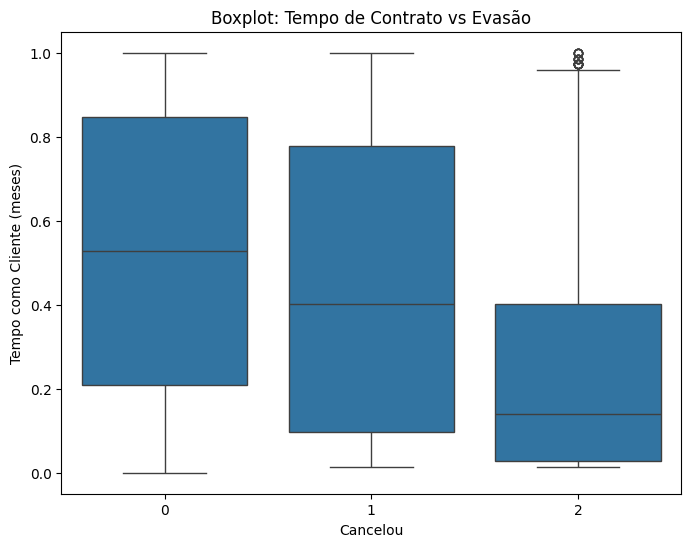

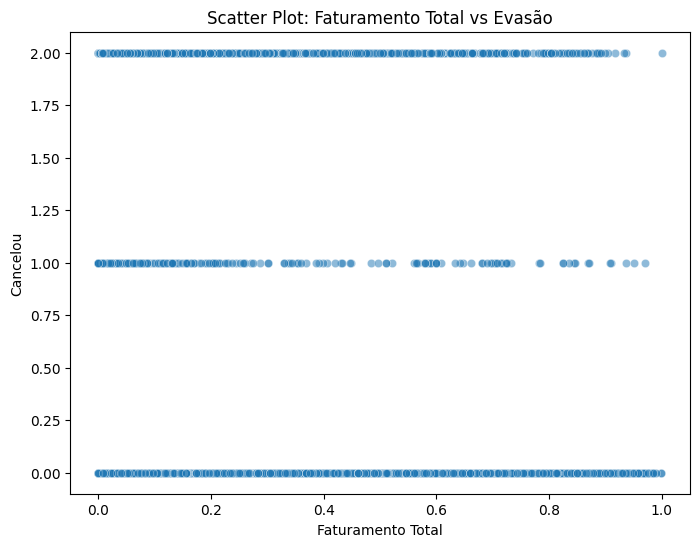

In [19]:
# Análises Direcionadas
# Investigue como variáveis específicas se relacionam com a evasão, como:
# Tempo de contrato × Evasão
# Total gasto × Evasão
# Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelou', y='tempo_cliente_meses', data=df)
plt.title('Boxplot: Tempo de Contrato vs Evasão')
plt.xlabel('Cancelou')
plt.ylabel('Tempo como Cliente (meses)')
plt.show()

# Scatter plot: Total gasto × Evasão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='faturamento_total', y='cancelou', data=df, alpha=0.5)
plt.title('Scatter Plot: Faturamento Total vs Evasão')
plt.xlabel('Faturamento Total')
plt.ylabel('Cancelou')
plt.show()

## 🤖 Modelagem Preditiva

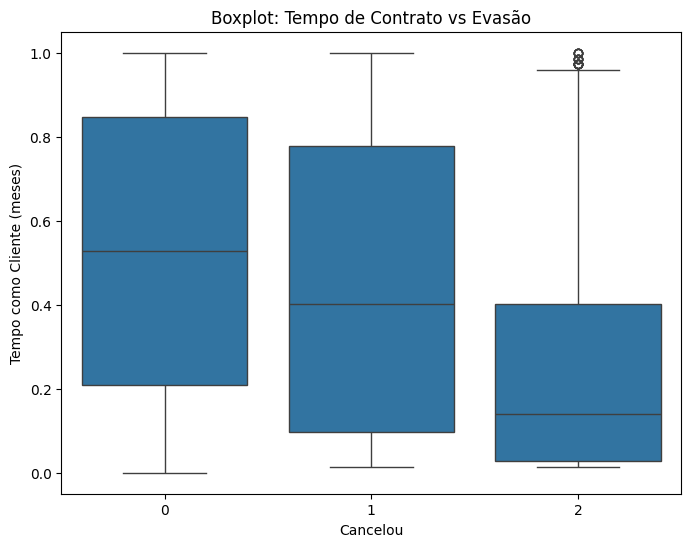

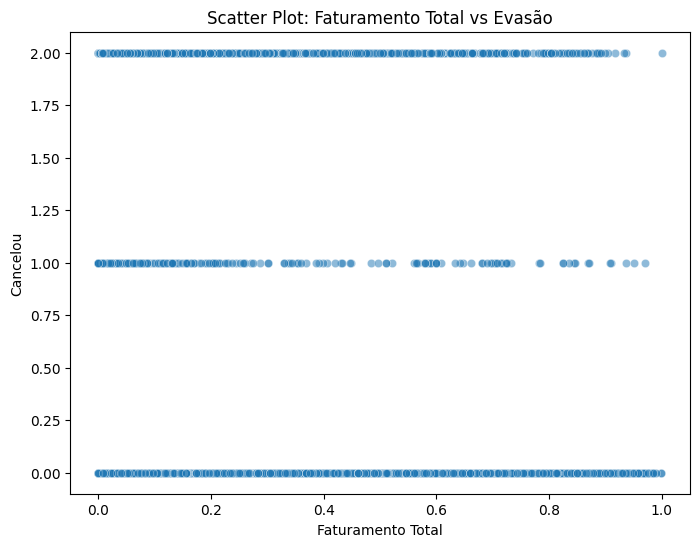

In [22]:
# Separação de Dados
# Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo.
# Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Se ainda não estiver carregado, use:
# df = pd.read_csv('/content/dados_tratados.csv')

# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelou', y='tempo_cliente_meses', data=df)
plt.title('Boxplot: Tempo de Contrato vs Evasão')
plt.xlabel('Cancelou')
plt.ylabel('Tempo como Cliente (meses)')
plt.show()

# Scatter plot: Faturamento Total × Evasão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='faturamento_total', y='cancelou', data=df, alpha=0.5)
plt.title('Scatter Plot: Faturamento Total vs Evasão')
plt.xlabel('Faturamento Total')
plt.ylabel('Cancelou')
plt.show()

In [24]:
# Criação de Modelos
# Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

# Um modelo pode exigir normalização, como Regressão Logística ou KNN.
# O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

# 💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados.
# Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

# Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Supondo que o DataFrame já esteja carregado como 'df'
# Se ainda não estiver, use: df = pd.read_csv('/content/dados_tratados.csv')

# Separar variáveis independentes e alvo
X = df.drop(columns=['cancelou', 'customerID'], errors='ignore')
y = df['cancelou']

In [25]:
# -------------------------------
# Modelo 1: Regressão Logística (com normalização)
# -------------------------------
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_lr, y_train_lr)
lr_preds = lr_model.predict(X_test_lr)

print("🔍 Modelo 1: Regressão Logística (com normalização)")
print("Acurácia:", accuracy_score(y_test_lr, lr_preds))
print(classification_report(y_test_lr, lr_preds))

🔍 Modelo 1: Regressão Logística (com normalização)
Acurácia: 0.7771664374140302
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1582
           1       0.00      0.00      0.00        67
           2       0.61      0.52      0.56       532

    accuracy                           0.78      2181
   macro avg       0.48      0.47      0.47      2181
weighted avg       0.74      0.78      0.76      2181



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Modelo 1: Regressão Logística (com normalização)
Acurácia: 0.7771664374140302
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1582
           1       0.00      0.00      0.00        67
           2       0.61      0.52      0.56       532

    accuracy                           0.78      2181
   macro avg       0.48      0.47      0.47      2181
weighted avg       0.74      0.78      0.76      2181



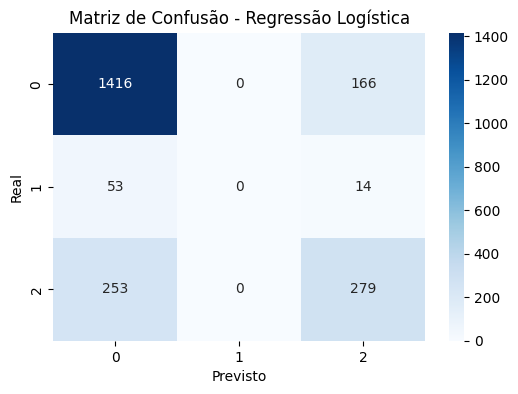


🔍 Modelo 2: Random Forest (sem normalização)
Acurácia: 0.7519486474094452
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1582
           1       0.00      0.00      0.00        67
           2       0.58      0.50      0.54       532

    accuracy                           0.75      2181
   macro avg       0.47      0.46      0.46      2181
weighted avg       0.74      0.75      0.74      2181



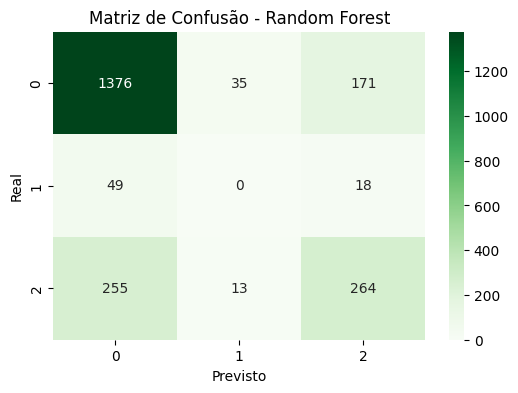

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Avaliação do modelo de Regressão Logística
print("🔍 Modelo 1: Regressão Logística (com normalização)")
print("Acurácia:", accuracy_score(y_test_lr, lr_preds))
print(classification_report(y_test_lr, lr_preds, zero_division=0))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_lr, lr_preds), annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Avaliação do modelo Random Forest
print("\n🔍 Modelo 2: Random Forest (sem normalização)")
print("Acurácia:", accuracy_score(y_test_rf, rf_preds))
print(classification_report(y_test_rf, rf_preds, zero_division=0))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_rf, rf_preds), annot=True, fmt="d", cmap="Greens", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [26]:
# -------------------------------
# Modelo 2: Random Forest (sem normalização)
# -------------------------------
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
rf_preds = rf_model.predict(X_test_rf)

print("\n🔍 Modelo 2: Random Forest (sem normalização)")
print("Acurácia:", accuracy_score(y_test_rf, rf_preds))
print(classification_report(y_test_rf, rf_preds))


🔍 Modelo 2: Random Forest (sem normalização)
Acurácia: 0.7519486474094452
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1582
           1       0.00      0.00      0.00        67
           2       0.58      0.50      0.54       532

    accuracy                           0.75      2181
   macro avg       0.47      0.46      0.46      2181
weighted avg       0.74      0.75      0.74      2181



✅ Justificativas:
Regressão Logística: requer normalização porque é sensível à escala das variáveis.
Random Forest: não requer normalização, pois é baseado em divisões de valores e não em distância.

In [ ]:
# Avaliação dos Modelos

# Avalie cada modelo utilizando as seguintes métricas:
# Acurácia
# Precisão
# Recall
# F1-score
# Matriz de confusão

# Em seguida, faça uma análise crítica e compare os modelos:
# Qual modelo teve o melhor desempenho?
# Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:
# Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados.
# Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

# Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples.
# Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

## 📋  Interpretação e Conclusões